# EDA for the All news data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load the example dataset
local_path = '/Users/xiaokangwang/Documents/PycharmProjects/Projects for Erdos 2024 fall/data_set/Example_All_news.csv'

df = pd.read_csv(local_path)

df.head()

,Unnamed: 0,date,year,month,day,author,title,article,url,section,publication
0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [ ]:
# Count the number of news articles per year
df['year'].value_counts()

year
2018    2645
2016    2594
2017    2426
2019    2335
Name: count, dtype: int64

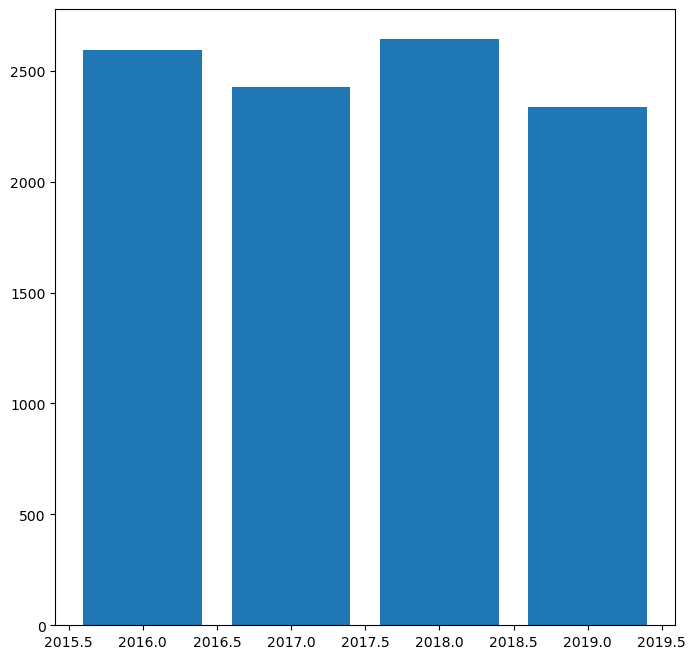

In [ ]:
# Plot the number of news articles per year
plt.figure(figsize=(8,8))

plt.bar(df['year'].value_counts().index, df['year'].value_counts())

plt.show()

### This first 10000 rows in the files the time is almost evenly distributed

#### Now looking at the specific time count:

In [ ]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2016-12-09 18:31:00
1   2016-10-07 21:26:46
2   2018-01-26 00:00:00
3   2019-06-27 00:00:00
4   2016-01-27 00:00:00
Name: date, dtype: datetime64[ns]

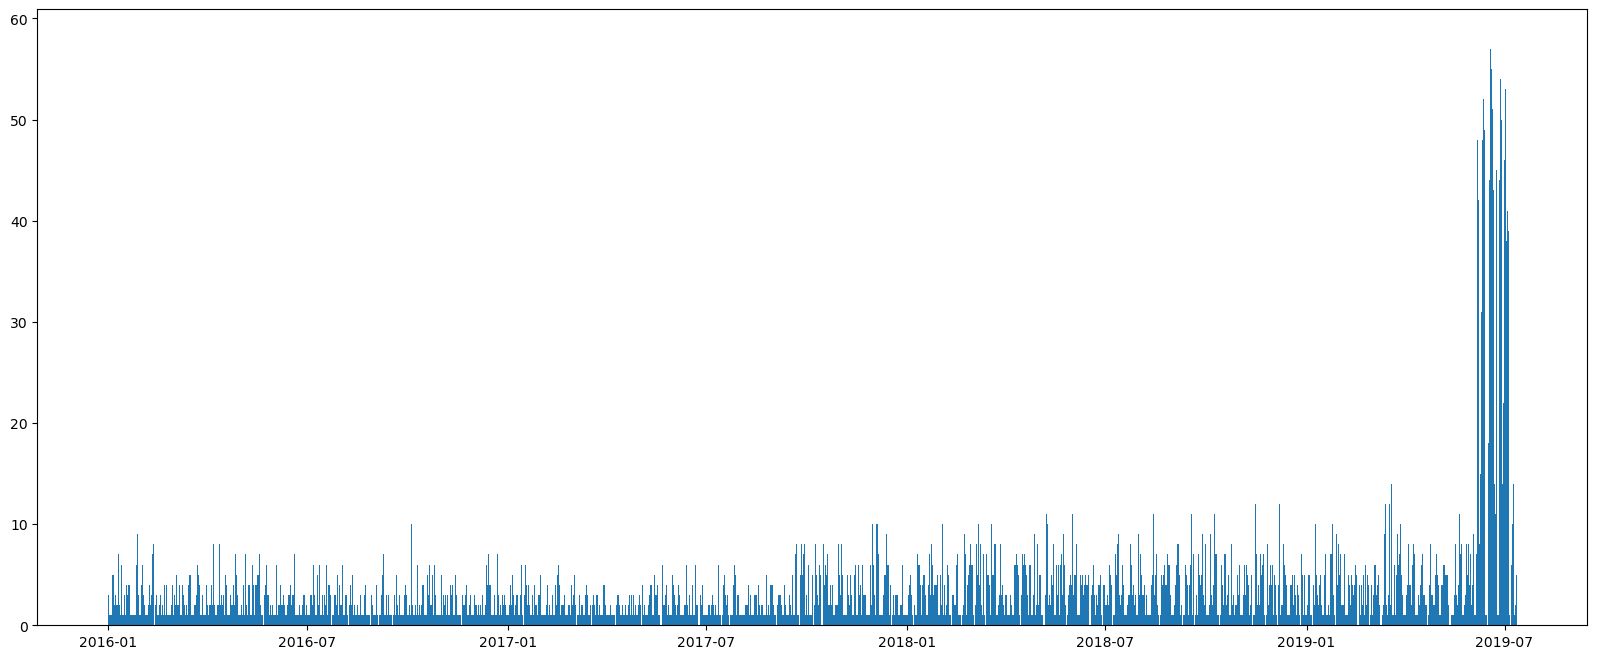

In [6]:
plt.figure(figsize=(20,8))

plt.bar(df['date'].value_counts().index, df['date'].value_counts().values)

plt.show()

### Note that there are still labels

In [ ]:
# Count the number of news articles per section
df['section'].value_counts()

section
World News                        847
Business News                     496
Noisey                            384
Politics                          366
Tech by VICE                      266
                                 ... 
Factbox                             1
wuvable oaf                         1
Vote Now                            1
Mergers & Acquisitions - Asias      1
The Power and Privilege Issue       1
Name: count, Length: 183, dtype: int64

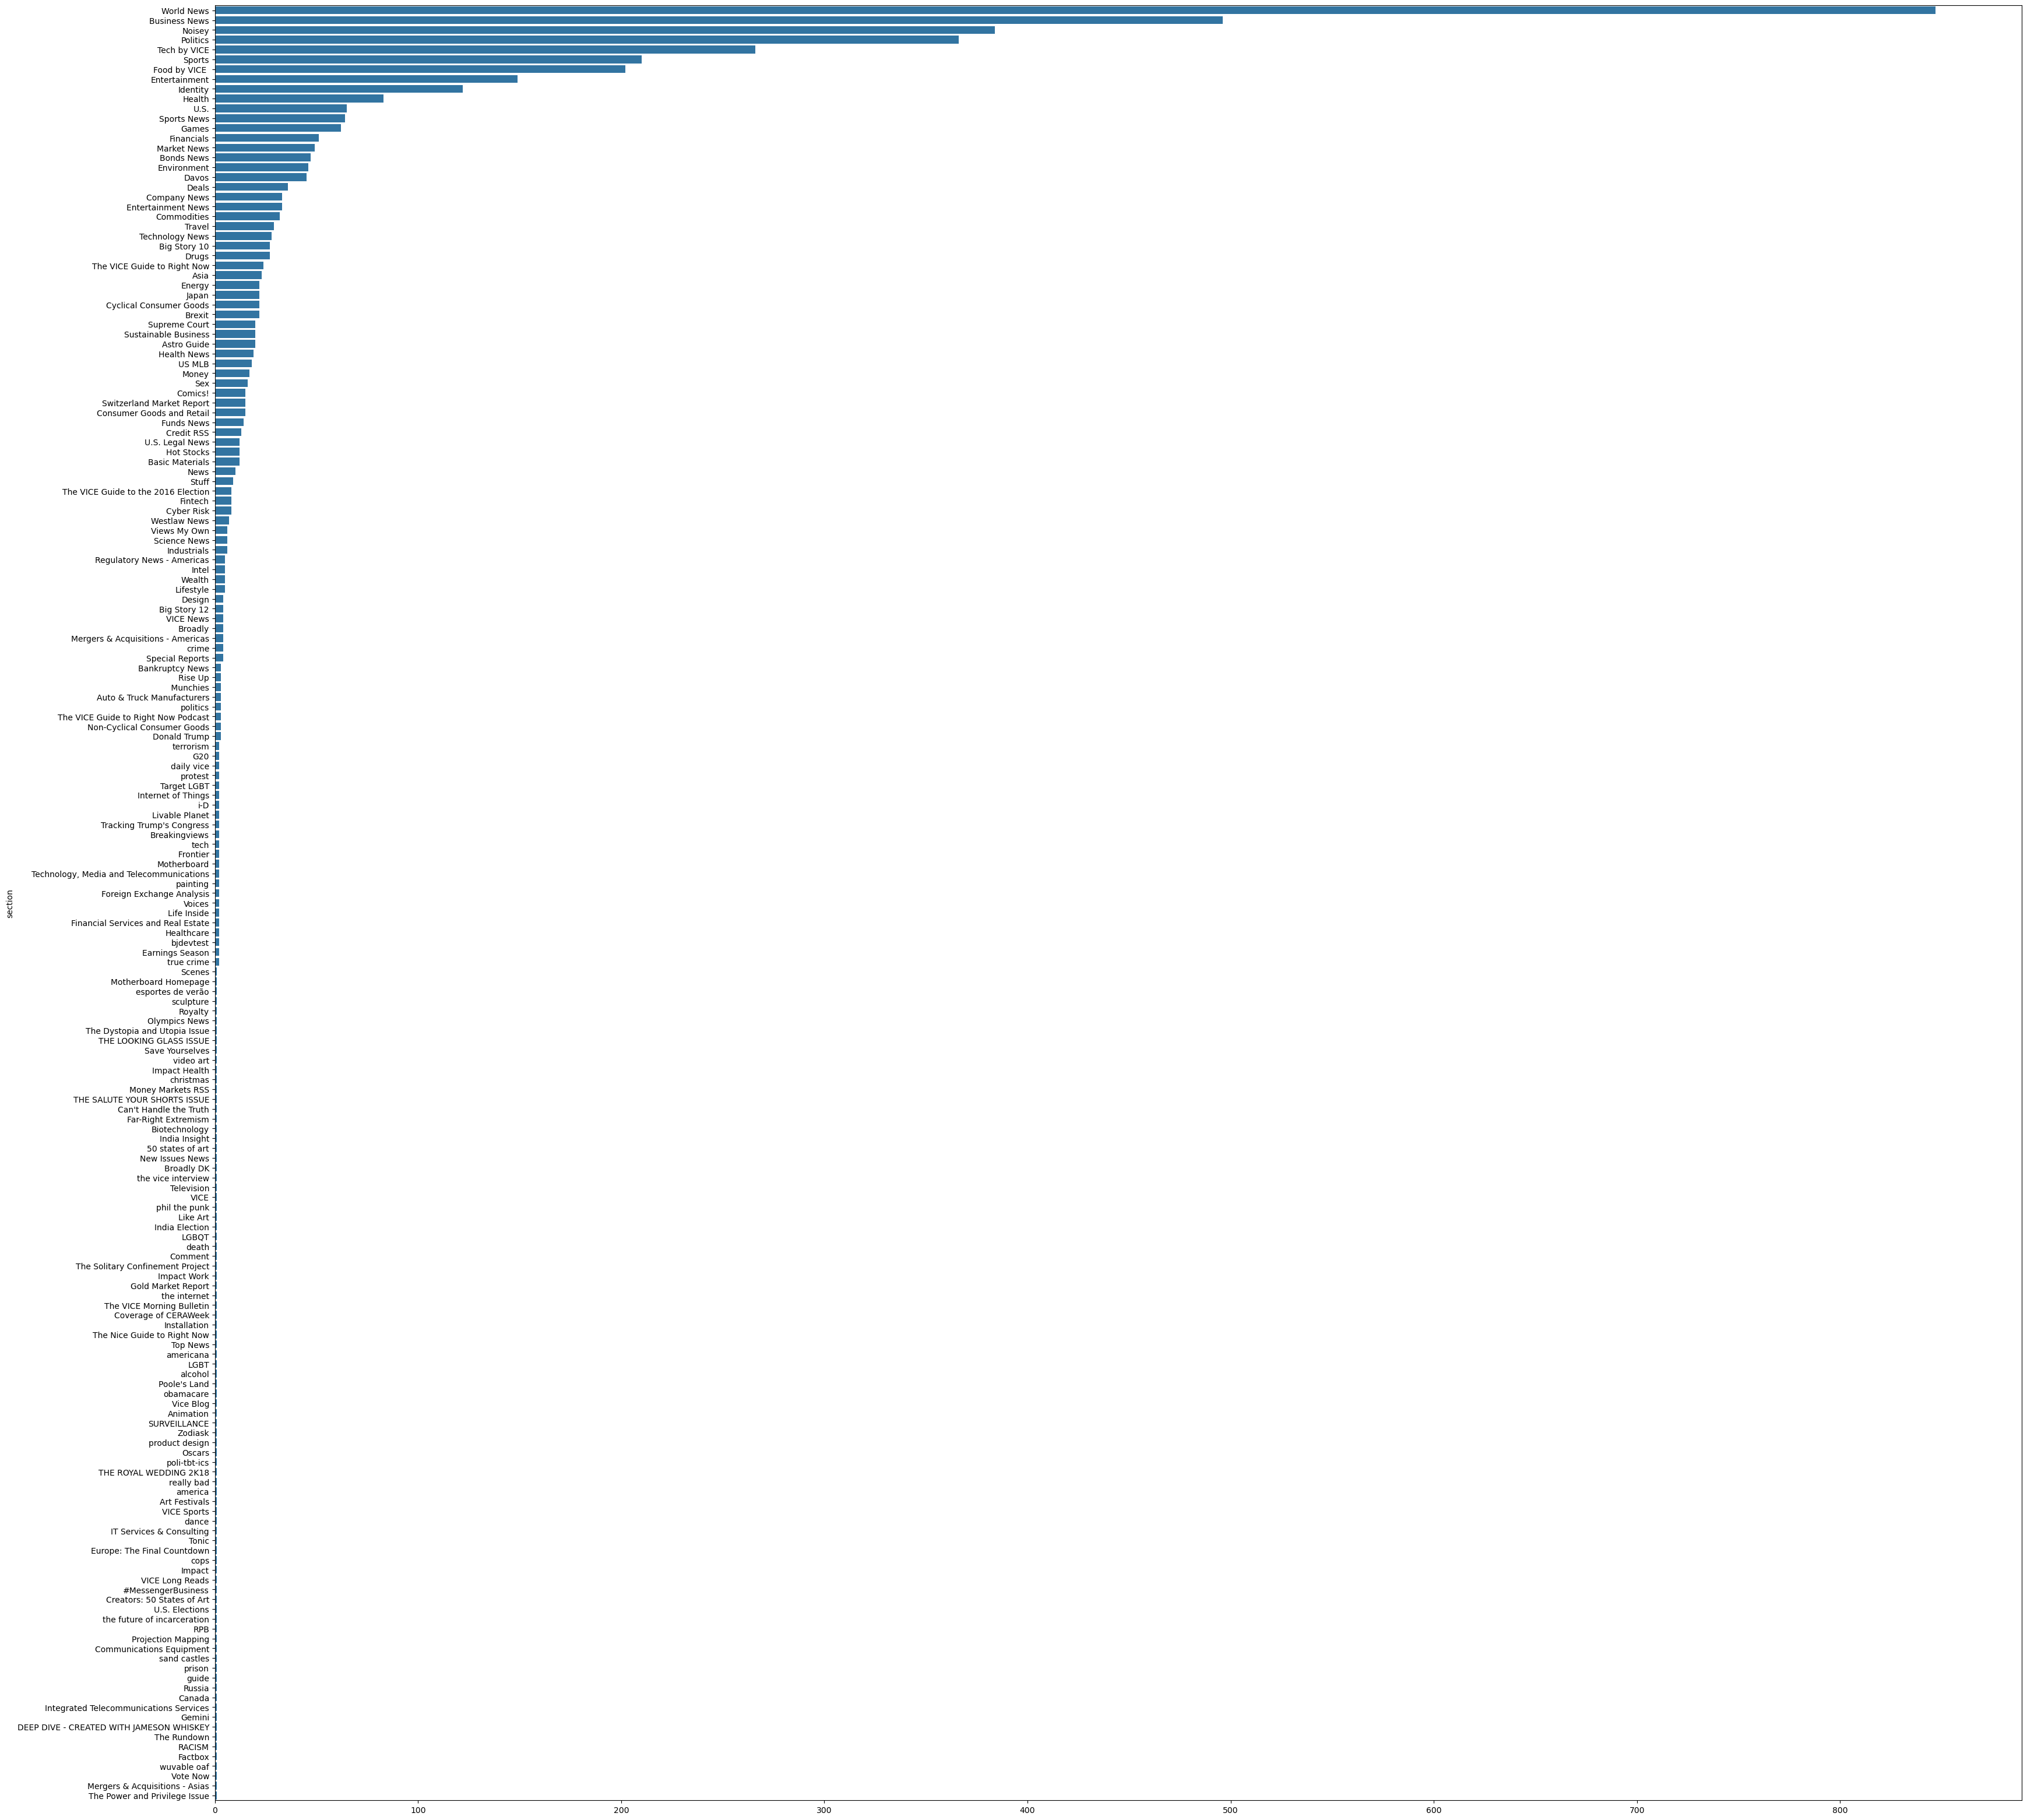

In [8]:
plt.figure(figsize=(40,40))

sns.barplot(y=df['section'].value_counts().index, x=df['section'].value_counts().values)

plt.yticks(rotation = 0, fontsize = 10)

plt.show()

### But there are still some nan lables. Note that nan is not of string type, it is of float type

In [ ]:
# Look at the type of the NAN values in the section column
print(df.iloc[0]['section'], type(df.iloc[0]['section']))


nan <class 'float'>


In [ ]:
# Find the number of NAN values in the section column
df[df['section'].isna()].count()

Unnamed: 0     5557
date           5557
year           5557
month          5557
day            5557
author         4133
title          5557
article        5551
url            5557
section           0
publication    5557
dtype: int64

### Lets look at the publishers

In [ ]:
# Describe the publisher column
print(df['publication'].value_counts())
print(df['publication'].value_counts().sum())
print(df['publication'].isna().sum())

publication
Reuters             2662
Vox                 2226
Vice                1785
TMZ                 1400
Vice News            828
Hyperallergic        590
Business Insider     509
Name: count, dtype: int64
10000
0


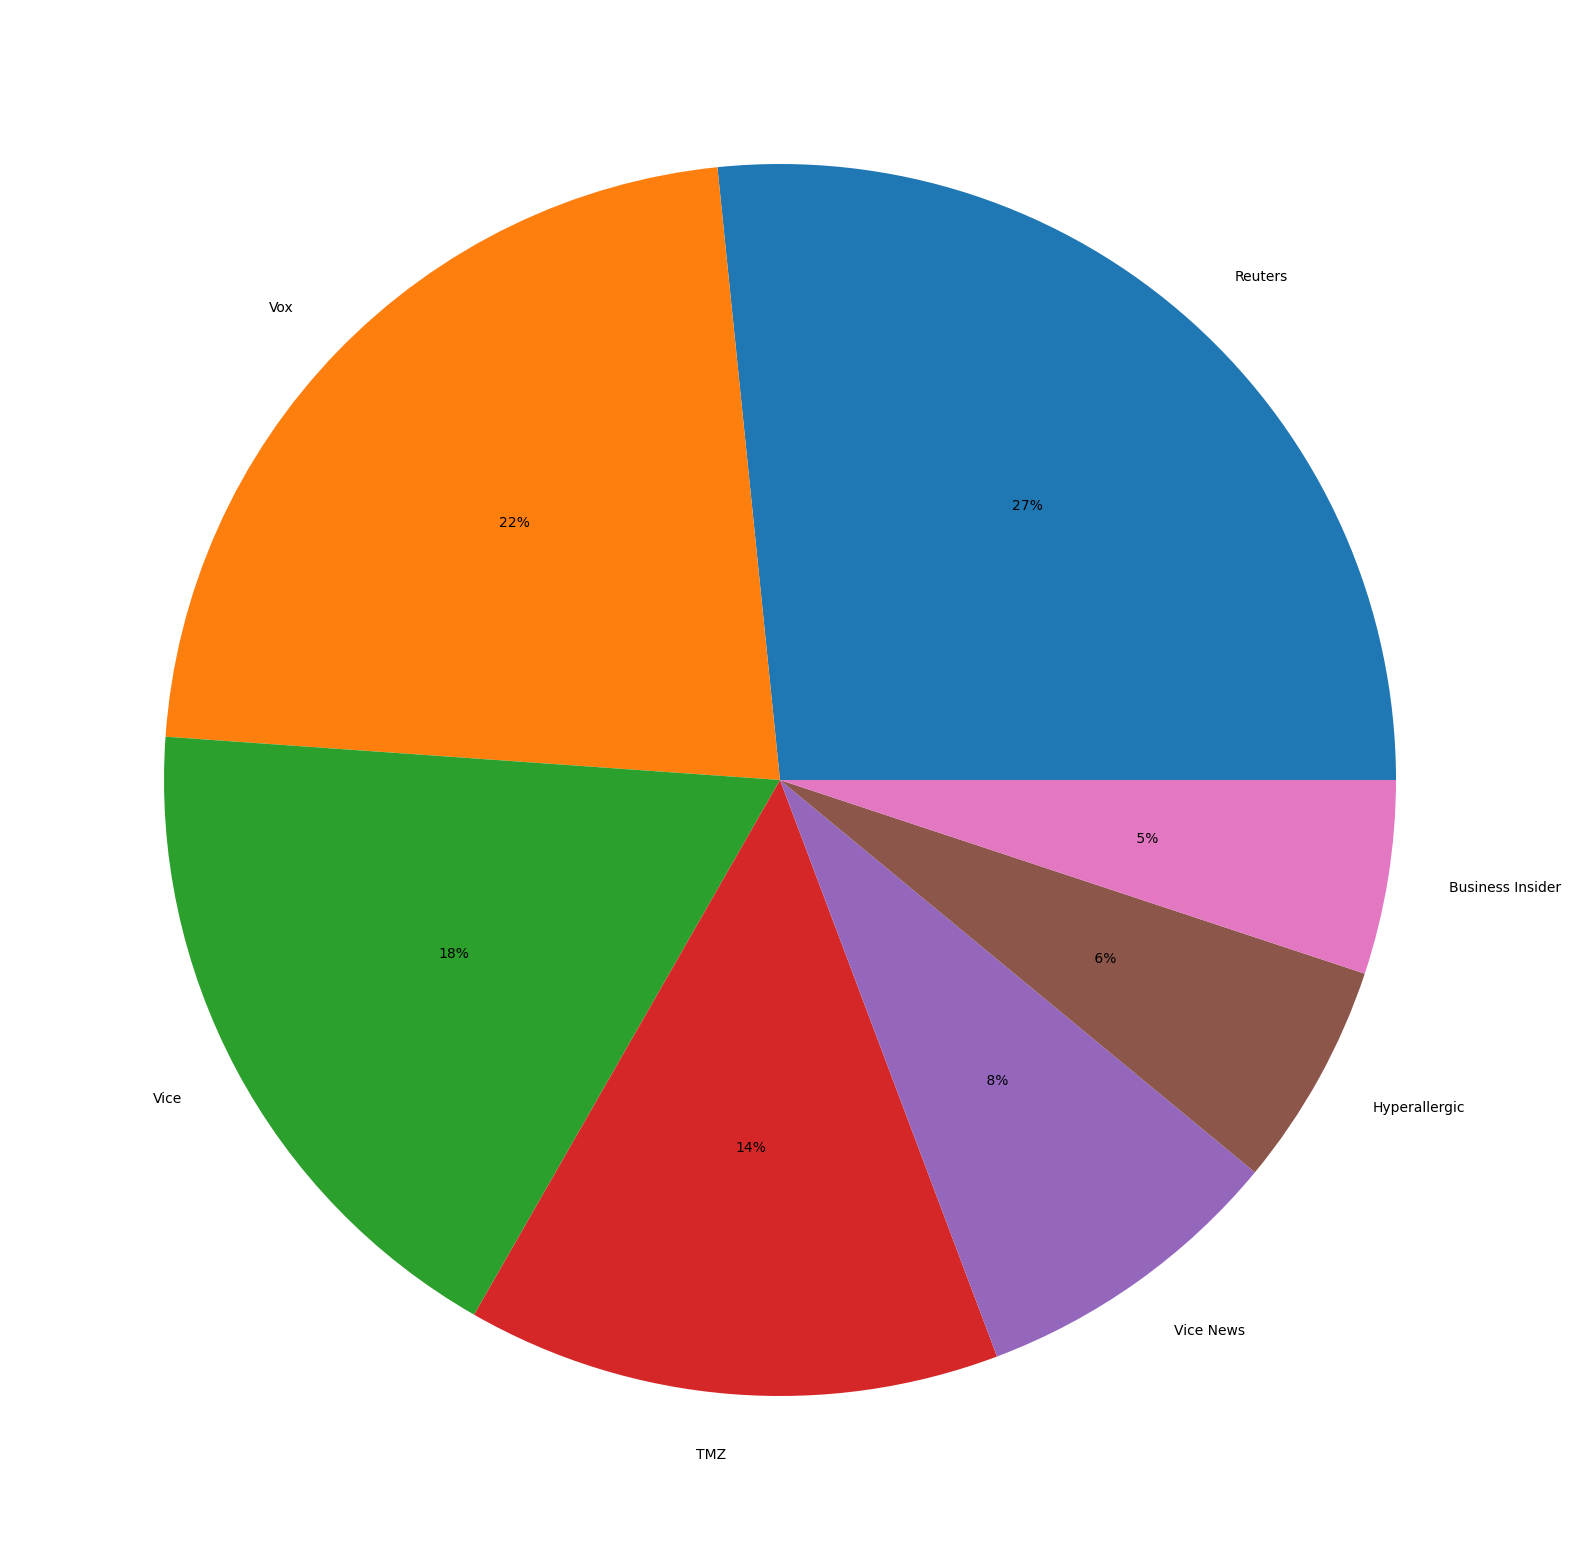

In [12]:
plt.figure(figsize=(20,20))

plt.pie(df['publication'].value_counts().values, autopct='%2.0f%%', 
                labels=df['publication'].value_counts().index)


plt.show()

### This is not of the same distribution as the whole data set as indicated in the description of the whole data set.

### Preprocessing pipline test

### 1: Drop the link and the time column

In [13]:
columns_to_drop = ['Unnamed: 0', 'author', 'year', 'month', 'day', 'url']

df = df.drop(columns_to_drop,axis=1)
df.head()

,date,title,article,section,publication
0,2016-12-09 18:31:00,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",NaN,Vox
1,2016-10-07 21:26:46,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,NaN,Business Insider
2,2018-01-26 00:00:00,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Davos,Reuters
3,2019-06-27 00:00:00,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,World News,Reuters
4,2016-01-27 00:00:00,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,NaN,TMZ


### 2: Select the publisher

In [14]:
## This is just an example, I don't need to do it now

publisher = {'Vox'}
print(type(publisher))
df[df['publication'].isin(publisher)]

<class 'set'>


,date,title,article,section,publication
0,2016-12-09 18:31:00,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",NaN,Vox
8,2016-05-18 13:00:06,How to watch the Google I/O keynote live,"Google I/O, the company's big developer confer...",NaN,Vox
10,2019-05-22 20:10:00,“Elizabeth Warren called me!” is turning into ...,Elizabeth Warren is giving people a new reason...,NaN,Vox
15,2016-09-08 15:40:02,Nancy Pelosi says a Clinton landslide could pu...,Nancy Pelosi is getting visions of reclaiming ...,NaN,Vox
16,2017-01-11 23:10:01,The government official in charge of ethics ju...,The nonpartisan director of the federal Office...,NaN,Vox
...,...,...,...,...,...
9984,2019-04-30 13:00:00,How Occupy Wall Street animated Bernie Sanders...,"It was late September 2011, and Radiohead was ...",NaN,Vox
9988,2017-05-11 17:00:02,The past 24 hours since Trump fired Comey were...,It’s the day after the day of the James Comey ...,NaN,Vox
9990,2016-03-08 12:00:36,NCAA March Madness Comes to Apple TV,College basketball fans will have a new way to...,NaN,Vox
9993,2016-10-20 19:25:02,"Good times, bad times: #TrumpBookReport's hila...",During the third and final presidential debate...,NaN,Vox


### 3: Remove the null

In [ ]:
# Find the null values in the dataframe
df.isna().sum()

date              0
title             0
article          27
section        5557
publication       0
dtype: int64

So there is no null element in title and article. It is OK for author and section to be null

In [16]:
df.isnull().sum()

date              0
title             0
article          27
section        5557
publication       0
dtype: int64

In [17]:
#df[df['author'].isna()]

Seems like they are also resonable data.

In [18]:
df[df['title'] == '']

,date,title,article,section,publication


In [19]:
#df[df['article'] == '']

In [20]:
df.dropna(subset=['article'], inplace=True)
df.isnull().sum()

date              0
title             0
article           0
section        5551
publication       0
dtype: int64

For now, there are no empty articles.

### 4: Add column of word counting:

In [ ]:
# Word count of the articles
df['word_count'] = df['article'].apply(lambda x: len(x.split()))
df['word_count'].describe()

count     9973.000000
mean       672.130452
std        874.152985
min          1.000000
25%        186.000000
50%        455.000000
75%        866.000000
max      16363.000000
Name: word_count, dtype: float64

<Figure size 800x800 with 0 Axes>

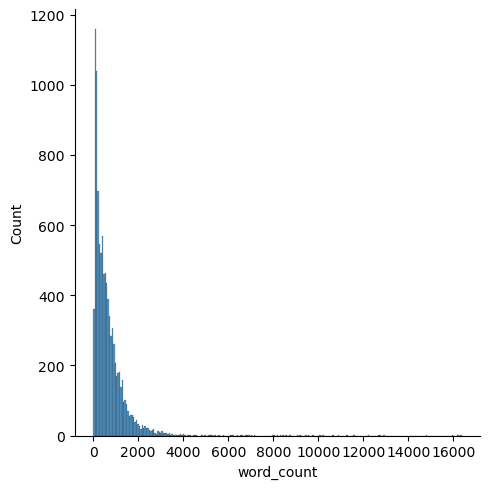

In [22]:
plt.figure(figsize=(8,8))

sns.displot(df['word_count'])

plt.show()

In [23]:
print(df['article'][df['article'].apply(lambda x: len(x.split())) <= 10])
#print(len(df['article'][df['article'].apply(lambda x: len(x.split())) <= 30]))

187           Advertise on Hyperallergic with Nectar Ads 
304           Advertise on Hyperallergic with Nectar Ads 
355           Advertise on Hyperallergic with Nectar Ads 
814         Advertise on Hyperallergic with Nectar Ads   
1148          Advertise on Hyperallergic with Nectar Ads 
1891      Check out more of Matias San Juan's art on I...
2015          Advertise on Hyperallergic with Nectar Ads 
2166     Check out more of Jana Vasiljević's work on h...
2481         Check out Ida's Tumblr, Instagram, and blog.
3022          Advertise on Hyperallergic with Nectar Ads 
3825    Where everything is fridge-worthy. Advertise o...
5098                                          Unexpected!
5822          Advertise on Hyperallergic with Nectar Ads 
5897      Check out Benny Montero's Instagram and Face...
7370          Advertise on Hyperallergic with Nectar Ads 
7609          Advertise on Hyperallergic with Nectar Ads 
8628    Check out Jim's blog, Instagram, Tumblr, and F...
8782          

Note that there contains some advertisments and one word news, which is not so good for clustering task.

### 5: Get the first 100 words:

In [24]:
def get_first_words(article_text):
    # Split the article text into words
    words = article_text.split()
    # Get the first 100 words
    first_100_words = words[:100]
    # Join them back into a string
    result = ' '.join(first_100_words)
    return result

In [25]:
df['summary'] = df['article'].apply(get_first_words)
df.head()

,date,title,article,section,publication,word_count,summary
0,2016-12-09 18:31:00,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",NaN,Vox,1102,"This post is part of Polyarchy, an independent..."
1,2016-10-07 21:26:46,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,NaN,Business Insider,267,The Indianapolis Colts made Andrew Luck the hi...
2,2018-01-26 00:00:00,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Davos,Reuters,81,"DAVOS, Switzerland (Reuters) - U.S. President ..."
3,2019-06-27 00:00:00,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,World News,Reuters,373,PARIS (Reuters) - Former French president Nico...
4,2016-01-27 00:00:00,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,NaN,TMZ,74,Paris Hilton arrived at LAX Wednesday dressed ...


In [26]:
artical_0 = df['article'][0]
print(artical_0)
print(len(df['summary'][0].split()))

This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs of a coming heart attack. You push for more certainty, but the doctor tells you she's not sure. The human body is a complex system. You're young and otherwise pretty healthy. There could be plenty of other explanations for what you're feeling. But it is a little worrying. So just to be on the safe side, maybe you should reduce the stress in your life and eat a healthier diet. What would you do? If you're a sensible person, you'd probably err on the side of precaution. Sure, it might be nothing to w

### 6: Text Tokenization

In [29]:
import nltk
from nltk import word_tokenize

# Download 'punkt' if you haven't already
nltk.download('punkt')

print(nltk.data.path)


['/Users/xiaokangwang/nltk_data', '/opt/anaconda3/nltk_data', '/opt/anaconda3/share/nltk_data', '/opt/anaconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/xiaokangwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#nltk.data.path.append('/Users/xiaokangwang/nltk_data')

# Compare the word_tokenizer with the split method
text = word_tokenize(df['summary'][0],language="english")
print(len(text), text)
print(len(df['summary'][0].split()), df['summary'][0].split())

117 ['This', 'post', 'is', 'part', 'of', 'Polyarchy', ',', 'an', 'independent', 'blog', 'produced', 'by', 'the', 'political', 'reform', 'program', 'at', 'New', 'America', ',', 'a', 'Washington', 'think', 'tank', 'devoted', 'to', 'developing', 'new', 'ideas', 'and', 'new', 'voices', '.', 'Imagine', 'you', 'are', 'an', 'otherwise', 'healthy', '30-something', 'who', 'starts', 'feeling', 'weird', '.', 'You', 'are', 'sometimes', 'short', 'of', 'breath', '.', 'You', 'get', 'migraines', '.', 'Your', 'feet', 'start', 'to', 'swell', 'a', 'little', '.', 'But', 'otherwise', ',', 'everything', 'seems', 'fine', '.', 'You', 'go', 'to', 'the', 'doctor', '.', 'The', 'doctor', 'runs', 'some', 'tests', '.', 'She', 'tells', 'you', ',', 'It', "'s", 'probably', 'nothing', ',', 'but', 'these', 'could', 'be', 'signs', 'of', 'a', 'coming', 'heart', 'attack', '.', 'You', 'push', 'for', 'more', 'certainty', ',', 'but', 'the', 'doctor', 'tells', 'you', 'she', "'s", 'not']
100 ['This', 'post', 'is', 'part', 'of',

.split() and word_tokenize are basically the same thing, but tokenize are better. The only problem is that tokenize will include punctuations, so we better removed them

In [31]:
def get_tokenized_words_with_no_punctuation(text):
    words = word_tokenize(text, language="english")
    words_no_punctuation = [word.lower() for word in words if word.isalnum()]
    return words_no_punctuation

In [32]:
print(len(get_tokenized_words_with_no_punctuation(df['summary'][0])),get_tokenized_words_with_no_punctuation(df['summary'][0]))

99 ['this', 'post', 'is', 'part', 'of', 'polyarchy', 'an', 'independent', 'blog', 'produced', 'by', 'the', 'political', 'reform', 'program', 'at', 'new', 'america', 'a', 'washington', 'think', 'tank', 'devoted', 'to', 'developing', 'new', 'ideas', 'and', 'new', 'voices', 'imagine', 'you', 'are', 'an', 'otherwise', 'healthy', 'who', 'starts', 'feeling', 'weird', 'you', 'are', 'sometimes', 'short', 'of', 'breath', 'you', 'get', 'migraines', 'your', 'feet', 'start', 'to', 'swell', 'a', 'little', 'but', 'otherwise', 'everything', 'seems', 'fine', 'you', 'go', 'to', 'the', 'doctor', 'the', 'doctor', 'runs', 'some', 'tests', 'she', 'tells', 'you', 'it', 'probably', 'nothing', 'but', 'these', 'could', 'be', 'signs', 'of', 'a', 'coming', 'heart', 'attack', 'you', 'push', 'for', 'more', 'certainty', 'but', 'the', 'doctor', 'tells', 'you', 'she', 'not']


### 7: Deleting the stop words

In [33]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
 

In [34]:
def remove_stop_words(words):
    words_no_stop_words = [word for word in words if word not in stop_words]
    return words_no_stop_words

In [35]:
print(len(remove_stop_words(get_tokenized_words_with_no_punctuation(df['summary'][0]))),remove_stop_words(get_tokenized_words_with_no_punctuation(df['summary'][0])))

56 ['post', 'part', 'polyarchy', 'independent', 'blog', 'produced', 'political', 'reform', 'program', 'new', 'america', 'washington', 'think', 'tank', 'devoted', 'developing', 'new', 'ideas', 'new', 'voices', 'imagine', 'otherwise', 'healthy', 'starts', 'feeling', 'weird', 'sometimes', 'short', 'breath', 'get', 'migraines', 'feet', 'start', 'swell', 'little', 'otherwise', 'everything', 'seems', 'fine', 'go', 'doctor', 'doctor', 'runs', 'tests', 'tells', 'probably', 'nothing', 'could', 'signs', 'coming', 'heart', 'attack', 'push', 'certainty', 'doctor', 'tells']


### 6: Lemmatization

In [36]:
from nltk.stem import WordNetLemmatizer

In [37]:
def lemmatize_words(article_text):
    words = get_tokenized_words_with_no_punctuation(article_text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

In [38]:
df['tokenized_words'] = df['article'].apply(lemmatize_words)

In [39]:
df.head()

,date,title,article,section,publication,word_count,summary,tokenized_words
0,2016-12-09 18:31:00,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",NaN,Vox,1102,"This post is part of Polyarchy, an independent...","[this, post, is, part, of, polyarchy, an, inde..."
1,2016-10-07 21:26:46,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,NaN,Business Insider,267,The Indianapolis Colts made Andrew Luck the hi...,"[the, indianapolis, colt, made, andrew, luck, ..."
2,2018-01-26 00:00:00,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Davos,Reuters,81,"DAVOS, Switzerland (Reuters) - U.S. President ...","[davos, switzerland, reuters, president, donal..."
3,2019-06-27 00:00:00,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,World News,Reuters,373,PARIS (Reuters) - Former French president Nico...,"[paris, reuters, former, french, president, ni..."
4,2016-01-27 00:00:00,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,NaN,TMZ,74,Paris Hilton arrived at LAX Wednesday dressed ...,"[paris, hilton, arrived, at, lax, wednesday, d..."


In [40]:
df['tokenized_words'] = df['tokenized_words'].apply(remove_stop_words)

In [41]:
df.head()

,date,title,article,section,publication,word_count,summary,tokenized_words
0,2016-12-09 18:31:00,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",NaN,Vox,1102,"This post is part of Polyarchy, an independent...","[post, part, polyarchy, independent, blog, pro..."
1,2016-10-07 21:26:46,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,NaN,Business Insider,267,The Indianapolis Colts made Andrew Luck the hi...,"[indianapolis, colt, made, andrew, luck, playe..."
2,2018-01-26 00:00:00,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Davos,Reuters,81,"DAVOS, Switzerland (Reuters) - U.S. President ...","[davos, switzerland, reuters, president, donal..."
3,2019-06-27 00:00:00,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,World News,Reuters,373,PARIS (Reuters) - Former French president Nico...,"[paris, reuters, former, french, president, ni..."
4,2016-01-27 00:00:00,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,NaN,TMZ,74,Paris Hilton arrived at LAX Wednesday dressed ...,"[paris, hilton, arrived, lax, wednesday, dress..."


In [42]:
df = df.drop('article', axis=1)
df.head()

,date,title,section,publication,word_count,summary,tokenized_words
0,2016-12-09 18:31:00,We should take concerns about the health of li...,NaN,Vox,1102,"This post is part of Polyarchy, an independent...","[post, part, polyarchy, independent, blog, pro..."
1,2016-10-07 21:26:46,Colts GM Ryan Grigson says Andrew Luck's contr...,NaN,Business Insider,267,The Indianapolis Colts made Andrew Luck the hi...,"[indianapolis, colt, made, andrew, luck, playe..."
2,2018-01-26 00:00:00,Trump denies report he ordered Mueller fired,Davos,Reuters,81,"DAVOS, Switzerland (Reuters) - U.S. President ...","[davos, switzerland, reuters, president, donal..."
3,2019-06-27 00:00:00,France's Sarkozy reveals his 'Passions' but in...,World News,Reuters,373,PARIS (Reuters) - Former French president Nico...,"[paris, reuters, former, french, president, ni..."
4,2016-01-27 00:00:00,Paris Hilton: Woman In Black For Uncle Monty's...,NaN,TMZ,74,Paris Hilton arrived at LAX Wednesday dressed ...,"[paris, hilton, arrived, lax, wednesday, dress..."


In [43]:
df['tokenized_words'].apply(len).describe()

count    9973.000000
mean      372.545373
std       446.626329
min         1.000000
25%       106.000000
50%       264.000000
75%       490.000000
max      9485.000000
Name: tokenized_words, dtype: float64

### 7:NER transformation

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Use spacy to extract named entities
def extract_ner_features(text):
    doc = nlp(text)
    entity_counts = {
        "PERSON": 0,
        "ORG": 0,
        "GPE": 0,
        "EVENT": 0,
        "PRODUCT": 0
    }
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
    return pd.Series(entity_counts)


In [ ]:
# Join the extracted features to the dataframe

A = df['tokenized_words'].apply(lambda x: extract_ner_features(' '.join(x)))
print(A.head())


   PERSON  ORG  GPE  EVENT  PRODUCT
0       3    1    4      0        0
1       1    2    1      0        1
2       4    2    1      0        0
3       6    0    2      0        0
4       2    1    2      0        0


In [47]:
df_new = df.join(A.apply(pd.Series))

In [48]:
df_new.head()

,date,title,section,publication,word_count,summary,tokenized_words,PERSON,ORG,GPE,EVENT,PRODUCT
0,2016-12-09 18:31:00,We should take concerns about the health of li...,NaN,Vox,1102,"This post is part of Polyarchy, an independent...","[post, part, polyarchy, independent, blog, pro...",3,1,4,0,0
1,2016-10-07 21:26:46,Colts GM Ryan Grigson says Andrew Luck's contr...,NaN,Business Insider,267,The Indianapolis Colts made Andrew Luck the hi...,"[indianapolis, colt, made, andrew, luck, playe...",1,2,1,0,1
2,2018-01-26 00:00:00,Trump denies report he ordered Mueller fired,Davos,Reuters,81,"DAVOS, Switzerland (Reuters) - U.S. President ...","[davos, switzerland, reuters, president, donal...",4,2,1,0,0
3,2019-06-27 00:00:00,France's Sarkozy reveals his 'Passions' but in...,World News,Reuters,373,PARIS (Reuters) - Former French president Nico...,"[paris, reuters, former, french, president, ni...",6,0,2,0,0
4,2016-01-27 00:00:00,Paris Hilton: Woman In Black For Uncle Monty's...,NaN,TMZ,74,Paris Hilton arrived at LAX Wednesday dressed ...,"[paris, hilton, arrived, lax, wednesday, dress...",2,1,2,0,0
